In [2]:
import numpy as np
import pandas as pd

# Problem Understanding

The National Health Service has determined that decisive action to treat diabetes is necessary. However, diagnosing it takes hours of doctors that are in high demand.<br>

Help them to predict who is diabetic and who is not based on data that non-medical stuff can obtain so that you reduce the number of people who:
- get treated without needing it
- don't get treated when they actually needed it

# Data Understanding

https://data.world/data-society/pima-indians-diabetes-database

In [3]:
df = pd.read_csv('pima-indians-diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Data preparation

### Split your X data in train and test datasets
Here is the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Split your train data in train and validation datasets

In [6]:
from sklearn.model_selection import train_test_split
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train)

### Scale the 3 datasets using StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train_s)

X_train_scaled = scaler.transform(X_train_s)
X_val_scaled = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling and Model Evaluation

### Train a logistic regression model with NO regularisation

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1.0,penalty='none',  solver='lbfgs')
model_log = logreg.fit(X_train_scaled, y_train_s)

initial_score = logreg.score(X_train_scaled, y_train_s)
parameters = logreg.coef_
inter = logreg.intercept_

print('The Initial R-Squared value for the logistic mode is ', initial_score.round(2))
print('The intercept of the regression is', inter.round(2))
print('The coefficients are ', parameters.round(2))

The Initial R-Squared value for the logistic mode is  0.76
The intercept of the regression is [-0.69]
The coefficients are  [[ 0.44  1.17 -0.24  0.16 -0.31  0.56  0.27  0.07]]


In [9]:
# make class predictions for the testing and validation set
y_train_log = logreg.predict(X_train_scaled)
y_val_log = logreg.predict(X_val)

### Measure the accuracy and ROC_AUC of your model
Here is the documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [10]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print('Training accuracy:',accuracy_score(y_train_s, y_train_log))
print('Testing accuracy:', accuracy_score(y_val, y_val_log))

Training accuracy: 0.7615740740740741
Testing accuracy: 0.3125


In [11]:
print('The ROC&AUC is:', roc_auc_score(y_train_s, y_train_log))

The ROC&AUC is: 0.7217230867960853


### Train a logistic regression model with L1 regularisation

In [61]:
logreg_l = LogisticRegression(C=1.0,penalty='l1',  solver='liblinear')
model_log_l = logreg_l.fit(X_train_scaled, y_train_s)

In [62]:
# make class predictions for the testing and validation set
y_train_las = logreg_l.predict(X_train_scaled)
y_val_las = logreg_l.predict(X_val)

### Measure the accuracy and ROC_AUC of your model


In [63]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print('Training accuracy:',accuracy_score(y_train_s, y_train_las))
print('Testing accuracy:', accuracy_score(y_val, y_val_las))

Training accuracy: 0.7592592592592593
Testing accuracy: 0.3125


In [64]:
print('The ROC&AUC is: ', roc_auc_score(y_train_s, y_train_las))

The ROC&AUC is:  0.7211386399578281


## Which model did you choose? Explain your reasoning

In [65]:
# ???????????????????????????????????????
# 
# 
# 
# 

# Interprete your winning model

### Extract your intercept and coefficients

In [66]:
initial_score = logreg.score(X_train_scaled, y_train_s)
parameters = logreg.coef_
inter = logreg.intercept_

print('The Initial R-Squared value for the logistic mode is ', initial_score.round(2))
print('The intercept of the regression is', inter.round(2))
print('The coefficients are ', parameters.round(2))

The Initial R-Squared value for the logistic mode is  0.76
The intercept of the regression is [-0.69]
The coefficients are  [[ 0.44  1.17 -0.24  0.16 -0.31  0.56  0.27  0.07]]


### Show the difference in probabilities when changing the value of one of your predictors

In [20]:
logreg.predict(X_train_scaled)[0:10]

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [96]:
# print(logreg.predict_proba(X_train_scaled)[0:10, 7])

### Extract the probability of a positive for your validation samples

In [95]:
# print('true:', y_val[0:25])
# print('false:', y_val_log[0:25])

In [23]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_val, y_val_log)

print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


[[ 0 99]
 [ 0 45]]


In [24]:
y_val.value_counts().head(1)/len(y_val)

0    0.6875
Name: Outcome, dtype: float64

### Extract FPR, TPR and thresholds

In [26]:
from sklearn.metrics import  roc_curve

In [27]:
# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train_scaled)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train_s, y_train_score)

# Calculate the probability scores of each point in the test set
y_val_score = model_log.decision_function(X_val_scaled)

# Calculate the fpr, tpr, and thresholds for the test set
val_fpr, val_tpr, val_thresholds = roc_curve(y_val, y_val_score)


### Plot the ROC curves for your training, validation (and, if you are done, test) datasets

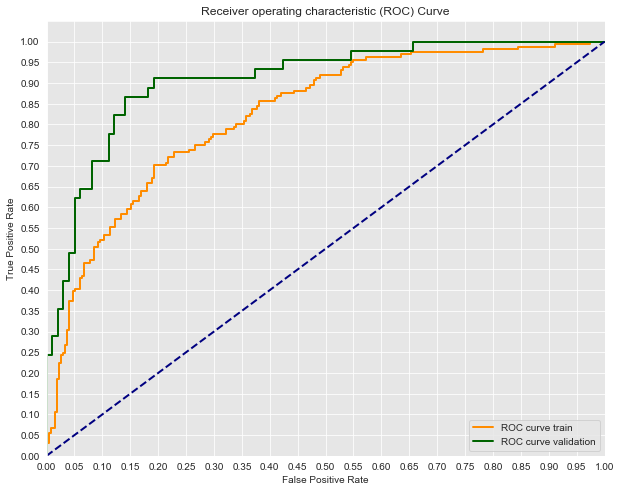

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='darkorange',lw=lw, label='ROC curve train')
plt.plot(val_fpr, val_tpr, color='darkgreen',lw=lw, label='ROC curve validation')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Threshold selection

### Estimate the prevalence in the environment where your model will be used

In [37]:
# Prevalence = N ALL POSITIVE / N TOTAL
Pre =  105 / 165

### Estimate the costs for each unit of your FPs, TNs, FNs and TPs
**Hint:** You don't have data for this. You will have to do some research and deep thinking<br>
**Hint 2:** think of a £ value or something else that non-technical stakeholders could relate to<br>
**Hint 3:** They are going to be approximations and that's fine. Just create a good logic.<br>

In [38]:
FPc = 1+250      # one person + exams cost
TNc = 0          # business as usual
FNc = 1*1*2500   # one person + one year + costs related with health complications
TPc =1*1*500+250 # one person + one year + costs related with specific medication + exams cost


### Calculate your m parameter

In [118]:
m = ((1 - Pre)/Pre)*((FPc - TNc)/(FNc - TPc))

### Calculate fm for each threshold

In [ ]:
TP = 100
FP = 10
TN = 50
FN = 5

In [42]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
fm = TPR - m*FPR
fm

0.9180408163265306

In [45]:
f = [(0.4, 0.3), (0.5, 0.4), (0.6, 0.5), (0.7, 0.6)]

### Select the threshold with the highest fm score

In [119]:
# selectin threshols 
count = 0
for x in f:
    po = (x[0]-m*x[1])
    count += 1
    print('fm_'+ str(count) + ': ' + str(po))

fm_1: 0.3754122448979592
fm_2: 0.46721632653061224
fm_3: 0.5590204081632653
fm_4: 0.6508244897959183


fm_4 = highest score, for the 0.4 p(+) threshold

### Plot the confusion matrix for your selected threshold

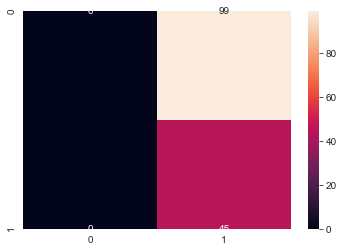

In [79]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.show()

### Calculate your alpha / power / precision / accuracy
(Don't use any library for this exercise, in real life you can though)

In [94]:
precision = TP/(TP + FP)
recall = TP/(TP + FN) # TPR, sensittivity, Power
accuracy = (TP + TN)/(TP + FP + TN + FN)
f1_score = 2*(precision * recall) / (precision + recall)

precision, f1_score.round(2), accuracy

(0.3125, 0.48, 0.3125)

### Explain in non-technical terms your alpha / power / precision / accuracy

In [ ]:
# 
# 
# 
# 
# 

# Actionable problem solving recommendations

### Write a brief paragraph telling your stakeholders something they can **DO** to be better off based on your model

In [ ]:
# 
# 
# 
# 
# 